In [74]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Create Toy Dataset

In [75]:
# Define parameters
nb_points = 100

il faut échantilloner des y dans la boule pour un x donné

In [76]:
eps = 1
L = 1

# Create bounding functions

In [77]:
def get_bounds_from_ball(epsilon,x,W,b):
    #### Starting from an input domain B(x, epsilon), we want to minimize and maximize a linear function Wx + b
    # epsilon scalar value
    # x (4,)
    # W (4,)
    # b scalar
    output = W@x - epsilon*np.linalg.norm(W) + b, W@x + epsilon*np.linalg.norm(W) + b # scalar
    return np.array(output) #(1,)

In [78]:
def square_backward_bounds(l, u, y):
    # l (4,)
    # u (4,)
    # y (4,)

    u = u - y
    l = l - y

    W = u + l #(4,)
    b = np.sum(-u*l) - W@y #scalar
    return W, np.array(b)[None]#(4,) & (1,)

In [79]:
def sqrt_backward_bounds(l,u, W_previous, b_previous):
    #stocker h'
    c = (l+u)/2
    W = W_previous*(1/(2*np.sqrt(c)))
    b = 0.5* np.sqrt(c) + (1/(2*np.sqrt(c)))*b_previous
    return W, b

In [80]:
def get_max(W,b,y):
    return minimize(lambda x: W @ x + b, y)

# Test 1D

In [81]:
def f(x):
    return np.sin(x)

In [191]:
i = 1
pt_choosen = 1
num_coordinates = 1

x = np.random.rand(nb_points, num_coordinates)*10-5

In [83]:

# selected_indices = np.random.choice(x.shape[0], size=num_points_to_select, replace=False)
# y = x[selected_indices]

In [84]:
def echantillonner_boule_l2_simple(x, epsilon):
  d = x.shape[0] # Dimension

  # 1. Vecteur gaussien aléatoire (direction)
  u = np.random.randn(d)
  norm_u = np.linalg.norm(u)

  
  # 2. Distance radiale (avec échelle pour uniformité en volume)
  s = np.random.rand() # Échantillon uniforme dans [0, 1)
  r = epsilon * s 

  # 3. Point final = centre + direction_normalisée * distance
  y = x + r * (u / norm_u)

  return y

In [85]:
lower_toy = x-eps
upper_toy = x+eps

In [86]:
x[pt_choosen]

array([-0.7314576])

In [87]:
y = echantillonner_boule_l2_simple(x[pt_choosen], eps)

In [88]:
y

array([-1.36947223])

In [89]:
lower_toy[pt_choosen]

array([-1.7314576])

In [90]:
upper_toy[pt_choosen]

array([0.2685424])

In [91]:
W_1, b_1 = square_backward_bounds(lower_toy[pt_choosen], upper_toy[pt_choosen],y)

In [92]:
W_1

array([1.27602926])

In [93]:
b_1

array([2.34042398])

In [94]:
x[pt_choosen]

array([-0.7314576])

In [95]:
z = np.linspace(x[pt_choosen]-eps, x[pt_choosen]+eps)

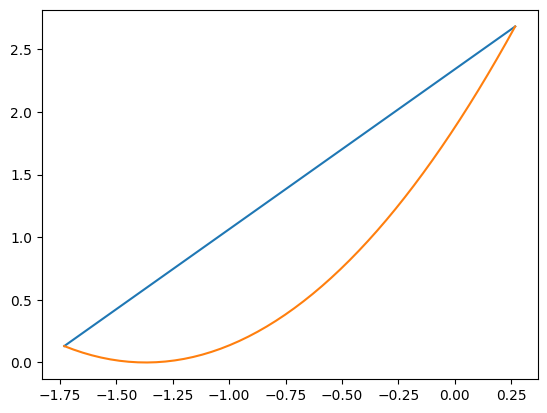

In [96]:
plt.plot(z, W_1*z+b_1)
plt.plot(z, np.square(z-y))
plt.show()

In [217]:
nb_points = 200
eps = 2
pt_choosen=8

In [218]:
y_list = []
for i in range(nb_points):
    y_list.append(echantillonner_boule_l2_simple(x[pt_choosen], eps))

In [219]:
l = x[pt_choosen]-eps
u = x[pt_choosen]+eps

In [220]:
W_list = []
b_list = []
for y_i in y_list:
    W_1, b_1 = square_backward_bounds(l,u,y_i)
    W_list.append(W_1)
    b_list.append(b_1)

In [230]:
len(W_list)

200

In [231]:
z = np.linspace(x[pt_choosen]-eps, x[pt_choosen]+eps)

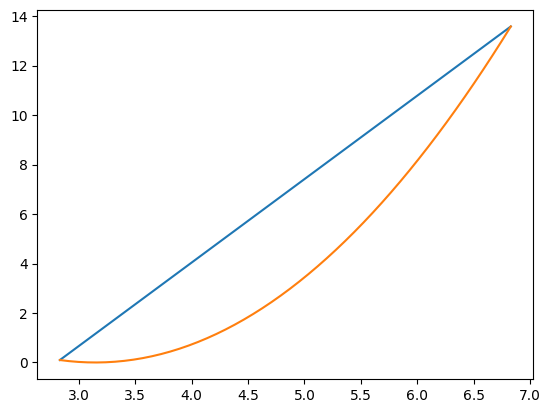

In [236]:
plt.plot(z, W_list[0]*z+b_list[0])
plt.plot(z, np.square(z-y_list[0]))
plt.show()

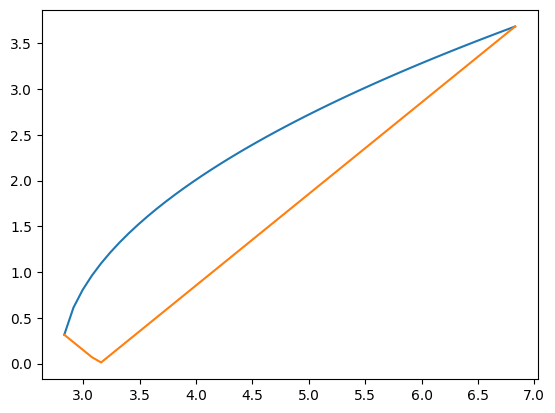

In [235]:
plt.plot(z, np.sqrt(W_list[0]*z+b_list[0]))
plt.plot(z, np.sqrt(np.square(z-y_list[0])))
plt.show()

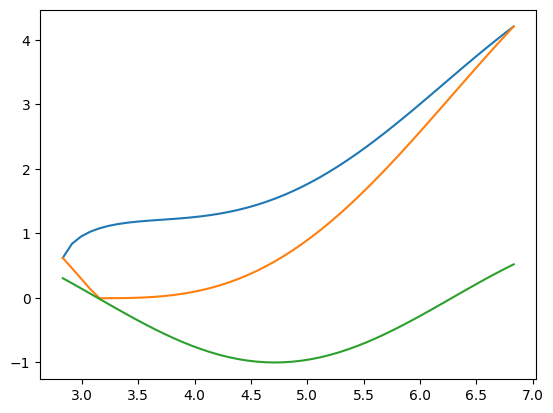

In [239]:
plt.plot(z, f(z) + L*np.sqrt(W_list[0]*z+b_list[0]))
plt.plot(z, f(z) + L*np.sqrt(np.square(z-y_list[0])))
plt.plot(z, f(z))
plt.show()

In [223]:
def function_to_optimize_all(x, W_list, b_list, y_list, f, L=1):
    # x (4,)
    outputs = []
    for i in range(len(y_list)):
        output = f(y_list[i]) +\
          L*np.sqrt(W_list[i]*x+b_list[i]) #scalar
        outputs.append(output)
        
    # print(output.shape)
    return np.min(outputs)

In [224]:
function_to_optimize_all(x[pt_choosen], W_list, b_list, y_list, f)

1.0025988266593115

In [225]:
z = np.linspace(x[pt_choosen]-eps, x[pt_choosen]+eps)

In [226]:
function_z = []
for z_i in z:
    function_z.append(function_to_optimize_all(z_i, W_list, b_list, y_list, f))

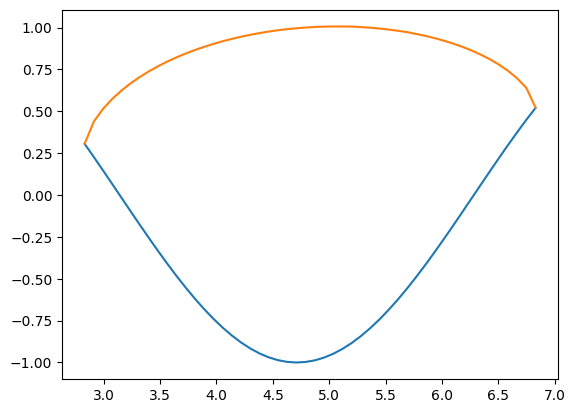

In [227]:
plt.plot(z, f(z))
plt.plot(z, function_z)
plt.show()

In [99]:
low, up = get_bounds_from_ball(eps, x[pt_choosen], W_1, b_1)

In [100]:
low

array([0.13103341])

In [101]:
up

array([2.68309193])

In [102]:
W_2, b_2 = sqrt_backward_bounds(low,up, W_1, b_1)

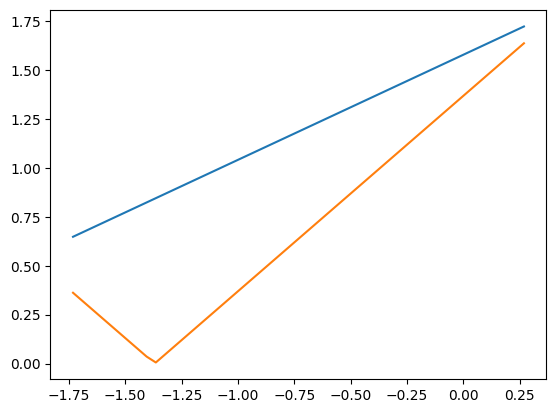

In [103]:
plt.plot(z, W_2*z+b_2)
plt.plot(z, np.sqrt(np.square(z-y)))
plt.show()

In [104]:
W_3 = L*W_2
b_3 = L*b_2 + f(y)


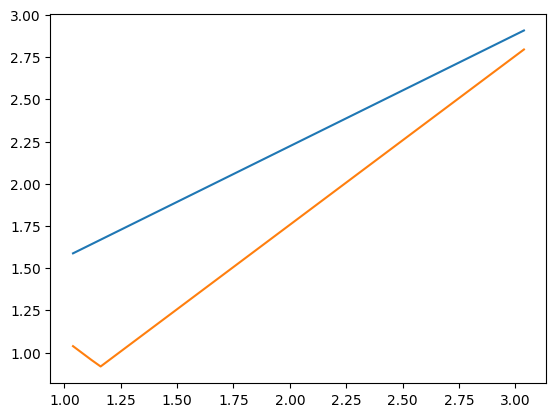

In [32]:
plt.plot(z, W_3*z+b_3)
plt.plot(z, f(y) + L*np.sqrt(np.square(z-y)))
plt.show()

# Test 4D

In [33]:
pt_choosen = 1
num_coordinates = 4

x = np.random.rand(nb_points, num_coordinates)*10-5

In [34]:
def f(x):
    # x shape(4,)
    output = x[0]*x[1]**2+x[2]-x[3] #f(scalar
    return np.array(output)[None]#(batch,1)

In [35]:
lower_toy = x-eps
upper_toy = x+eps

In [36]:
y = echantillonner_boule_l2_simple(x[pt_choosen], eps)

In [37]:
y.shape

(4,)

In [38]:
W_1, b_1 = square_backward_bounds(lower_toy[pt_choosen], upper_toy[pt_choosen],y)

In [39]:
import numpy as np
from scipy.optimize import minimize

In [40]:
def function_to_optimize(x, W, b, y):
    # x (4,)
    output = f(y) + L*np.sqrt(W@x+b) #scalar
    # print(output.shape)
    return output

In [41]:
def jac_function_to_optimize(x, W, b, y):
    output = L/(2*np.sqrt(W@x+b))*W
    # print(output.shape)
    return output

In [42]:
x[pt_choosen-1], x[pt_choosen]

(array([-3.17932579,  1.55816745, -3.83566788, -1.91767015]),
 array([-0.02009536,  3.74848984, -0.13295529, -2.04837169]))

In [43]:
# # Define your convex function
# def f(x):
#     # Example: quadratic function
#     return np.dot(x, x) + 3 * x[0] - x[1]  # Replace with your actual function
x_ball_center = x[pt_choosen]
# Define the constraint: ||x - x_centre||_2**2 <= eps**2
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

args_constraint = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_constraint
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), jac= lambda x :-jac_function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [ 0.1970997   3.52848139  0.7592038  -1.71901664]
max value: 1.530733068149741


In [44]:
function_to_optimize(result.x, W_1, b_1, y)

array([1.53073307])

In [45]:
x_ball_center

array([-0.02009536,  3.74848984, -0.13295529, -2.04837169])

In [46]:
unit_ball_constraint(result.x, x_ball_center, eps)

-5.022657845188405e-10

In [47]:
np.linalg.norm(result.x-x_ball_center)

1.000000000251133

In [48]:
result.message

'Optimization terminated successfully'

# Application to our NN

In [49]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import keras.ops as K
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy

# from keras.models import Sequential
from deel.lip.model import Sequential

from deel.lip.layers import (
    SpectralDense,
    SpectralConv2D,
    ScaledL2NormPooling2D,
    FrobeniusDense,
)
from deel.lip.activations import GroupSort, GroupSort2
from deel.lip.losses import HKR, KR, HingeMargin, MulticlassHKR, MulticlassKR

import numpy as np
import decomon

from data_processing import load_data, select_data_for_radius_evaluation_MNIST08
from radius_evaluation_tools import compute_binary_certificate, starting_point_dichotomy

In [50]:
x_train, x_test, y_train, y_test, y_test_ord = load_data("MNIST08")

In [51]:
model_path = "/home/aws_install/robustess_project/lip_models/demo3_FC_vanilla_MNIST08_channelfirst_False_disj_Neurons_single_output.keras"
model = keras.models.load_model(model_path)
model.compile(
   
    loss=HKR(
        alpha=10.0, min_margin=1.0
    ),  # HKR stands for the hinge regularized KR loss
    metrics=[
        # KR,  # shows the KR term of the loss
        HingeMargin(min_margin=1.0),  # shows the hinge term of the loss
    ],
    optimizer=Adam(learning_rate=0.001),)

/home/aws_install/miniconda3/envs/k3torchenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [52]:
pt_choosen = 1

In [53]:
x = x_train[pt_choosen:pt_choosen+1].flatten()

In [65]:
eps=0.2

In [66]:
lower_toy = x-eps
upper_toy = x+eps

In [67]:
y = echantillonner_boule_l2_simple(x, eps)

In [68]:
W_1, b_1 = square_backward_bounds(lower_toy, upper_toy,y)

In [69]:
def function_to_optimize(x, W, b, y):
    # x (4,)
    output = model(y.reshape((1,28,28))[None]).cpu().detach().numpy()[0,0] + L*np.sqrt(W@x+b) #scalar
    # print(output.shape)
    return output

In [70]:
def jac_function_to_optimize(x, W, b, y):
    output = L/(2*np.sqrt(W@x+b))*W
    # print(output.shape)
    return output

In [71]:
# # Define your convex function
# def f(x):
#     # Example: quadratic function
#     return np.dot(x, x) + 3 * x[0] - x[1]  # Replace with your actual function
x_ball_center = x
x_ball_center = np.asarray(x_ball_center, dtype=np.float64)

# Define the constraint: ||x - x_centre||_2**2 <= eps**2
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

args_contrainte = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_contrainte
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), jac= lambda x :-jac_function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [ 4.49405271e-04 -6.74707278e-03 -6.41113102e-04 -4.22443902e-03
  2.10101422e-03  9.36394122e-03 -1.49614683e-02 -9.10198283e-04
  1.43161780e-02  1.22756702e-02  7.14877295e-03  3.79159619e-03
  6.27722089e-03 -1.60284003e-03 -1.33270526e-04  4.37965479e-03
 -7.38273372e-03  3.47692580e-03  9.01535259e-04 -1.00964877e-03
  6.17050399e-03  5.75765054e-03 -9.46650278e-03 -1.98824083e-03
  3.93329486e-03 -1.23674043e-02  6.61013878e-03 -7.38823398e-04
  4.00070543e-03  2.76445958e-03  8.86520019e-03 -5.92559541e-03
 -1.46891213e-03  1.73360653e-02 -4.78049886e-03 -4.74273783e-03
 -3.25735274e-03 -1.08918599e-02  8.15357081e-03  5.72057561e-03
 -7.86085814e-03  5.88270471e-03  4.38075318e-03 -6.69211760e-03
 -1.90147756e-03 -8.58067526e-03  6.93911884e-03 -4.27520208e-03
  9.13976594e-03 -1.61124120e-02 -4.13985126e-03 -6.45937496e-03
  5.79257910e-03 -1.08116821e-03  8.20820801e-03  1.10014411e-02
 -4.46038521e-03 -1.00535503e-02 -7.48085986e-04  1.06576594e-02
  9.7003677

In [72]:
model(x.reshape((1,28,28))[None,:])

tensor([[-3.8370]], device='cuda:0', grad_fn=<MmBackward0>)

In [73]:
model(x_train[pt_choosen:pt_choosen+1])

tensor([[-3.8370]], device='cuda:0', grad_fn=<MmBackward0>)